# Assignment 9A - Hasanat Hasan

## Problem 1: The Ising Model
### Write a program to perform a Markov Chain Monte Carlo (MCMC) simulation of the Ising model on a 20 × 20 square lattice. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps
### (a) First write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of spin values, go through every pair of adjacent spins and add up the contributions $\sigma_i\sigma_j$ from all of them, then multiply by −J

#  Part (a) functions:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def ising_energy(spins: np.ndarray, J: float) -> float:
    ''' 
    Calculates the total energy of the 2D ising model using vectorized operations.
    '''
    energy = 0.0
    energy += np.sum(spins[:, :-1] * spins[:, 1:])     # horizontal
    energy += np.sum(spins[:-1, :] * spins[1:, :])     # vertical
    return -J * energy

def magnetization(spins: np.ndarray) -> float:
    ''' 
    Calculates the total magnetization of a 2d ising model with vectorized operations
    '''
    M: float = np.sum(spins)
    return M

### Solution:

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# initialize variables
J = 1
L = 20  
initial_spins = np.random.choice([-1, 1], size=(L, L)) 
# print(initial_spins)
print("Energy:", ising_energy(initial_spins, J))

Energy: -12.0


### b) Implement a Metropolis-style simulation of the Ising model with J = 1 and temperature T = 1 in units where the Boltzmann constant kB is also 1

## Part (b) Solution functions:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def ising_energy(spins: np.ndarray, J: float = 1) -> float:
    ''' 
    Calculates the total energy of the 2D ising model using vectorized operations.
    '''
    energy = 0.0
    energy += np.sum(spins[:, :-1] * spins[:, 1:])     # horizontal
    energy += np.sum(spins[:-1, :] * spins[1:, :])     # vertical
    return -J * energy

def magnetization(spins: np.ndarray) -> float:
    ''' 
    Calculates the total magnetization of a 2d ising model with vectorized operations
    '''
    M: float = np.sum(spins)
    return M

def random_spin_flip(spins: np.ndarray) -> np.ndarray:
    """
    Returns a new configuration by flipping a randomly chosen spin
    in the input 2D spin array.
    """
    # Copy to avoid modifying original array
    new_spins = spins.copy()
    
    # Randomly select a spin to flip
    i = np.random.randint(0, new_spins.shape[0])
    j = np.random.randint(0, new_spins.shape[1])
    
    # Flip the spin
    new_spins[i, j] *= -1
    
    return new_spins

## Metropolis Algorithim
def metropolis_sampling(iterations: int,
                        x_init: float,
                        proposal_func: callable,
                        target_func: callable,
                        calc_observable: callable):
    """
    Metropolis algorithm for sampling from a target distribution.
    #NOTE: THIS ASSUMES THE PROPOSAL DISTRIBUTION IS SYMMETRIC
    """
    # Initialize the state and an empty list to store samples
    x_old = x_init
    observables_list = []
    
    for i in range(iterations):
        # Generate a new state (proposal)
        x_new = proposal_func(x_old)

        # Compute the acceptance ratio (P(x_new) / P(x_old))
        ratio = target_func(x_new) / target_func(x_old)
        acceptance_prob = min(1.0, ratio)

        # Accept or reject the new state
        if np.random.uniform(0, 1) < acceptance_prob:
            x_old = x_new  # Accept the new state

        # Always append the observable (whether accepted or not)
        observable = calc_observable(x_old)
        observables_list.append(observable)
    
    return np.array(observables_list)


# Part (c) Magnetization Plot:


## Set up:

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Global constants:
T = 1
KB = 1
BETA = 1/(KB*T) # global constant
# initialize variables
J = 1
L = 20  
iterations = 1_000_000

def exp_distr(spin_state: np.ndarray):
    ''' 
    Calculates the total energy of a spin state and exponentiates it:
        p(E) ~ exp(-BE)
    '''
    energy = ising_energy(spin_state)
    sample_value: float = np.exp(-BETA*energy)
    return sample_value

## Solution

/tmp/ipykernel_84985/1200380422.py:19: RuntimeWarning: overflow encountered in exp
  sample_value: float = np.exp(-BETA*energy)
/tmp/ipykernel_84985/3295245568.py:56: RuntimeWarning: invalid value encountered in scalar divide
  ratio = target_func(x_new) / target_func(x_old)


Text(0, 0.5, 'Normalized Magnetization')

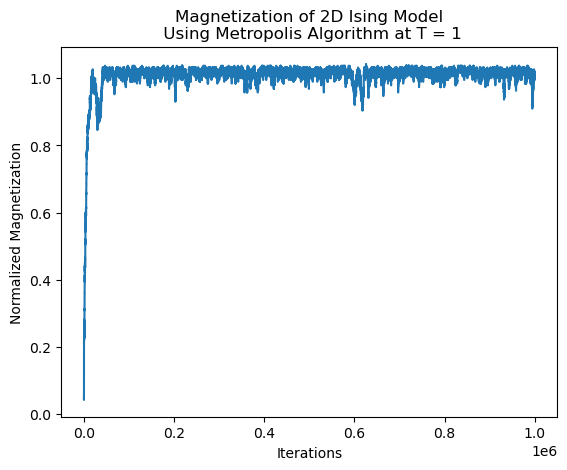

In [5]:
# Initial State:
initial_spins = np.random.choice([-1, 1], size=(L, L)) 
proposal_func = lambda x: random_spin_flip(x)
obseravble = lambda x: magnetization(x)
target_distr = lambda x: exp_distr(x)

# solution:
mag_list = metropolis_sampling(iterations,
                            initial_spins,
                            proposal_func,
                            target_distr,
                            obseravble)

normed_mag_list = (1/mag_list[-1])*mag_list 

plt.title(f"Magnetization of 2D Ising Model\n Using Metropolis Algorithm at T = {T}")
plt.plot(range(iterations),normed_mag_list )
plt.xlabel("Iterations")
plt.ylabel("Normalized Magnetization")

## Part (d) Solution Plot:

## Set up 


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Global constants:
T = 2.5
KB = 1
BETA = 1/(KB*T) # global constant
# initialize variables
J = 1
L = 20  
iterations = 1_000_000

def exp_distr(spin_state: np.ndarray):
    ''' 
    Calculates the total energy of a spin state and exponentiates it:
        p(E) ~ exp(-BE)
    '''
    energy = ising_energy(spin_state)
    sample_value: float = np.exp(-BETA*energy)
    return sample_value

## Solution

Text(0, 0.5, 'Normalized Magnetization')

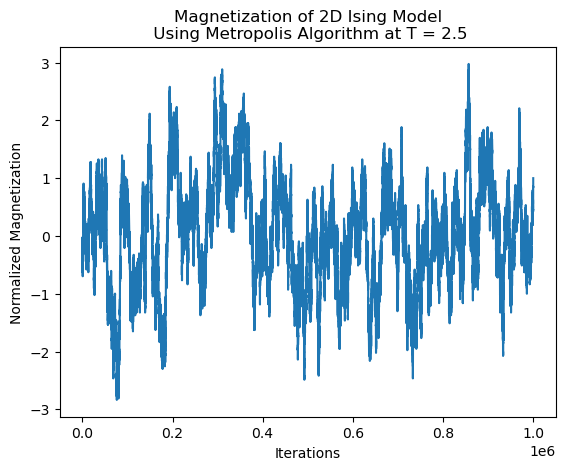

In [8]:
# Initial State:
initial_spins = np.random.choice([-1, 1], size=(L, L)) 
proposal_func = lambda x: random_spin_flip(x)
obseravble = lambda x: magnetization(x)
target_distr = lambda x: exp_distr(x)

# solution:
mag_list = metropolis_sampling(iterations,
                            initial_spins,
                            proposal_func,
                            target_distr,
                            obseravble)

normed_mag_list = (1/mag_list[-1])*mag_list 

plt.title(f"Magnetization of 2D Ising Model\n Using Metropolis Algorithm at T = {T}")
plt.plot(range(iterations),normed_mag_list )
plt.xlabel("Iterations")
plt.ylabel("Normalized Magnetization")